In [5]:
import numpy as np
import matplotlib.pyplot as plt

u_t + 2u_x = x + t
u_x(0) = exp(-t)
u_t(0) = cos(pi*x)

In [55]:
T = 1.0
X = 1.0
tau = 0.001
h = 0.004

K = int(T / tau)
M = int(X/h)

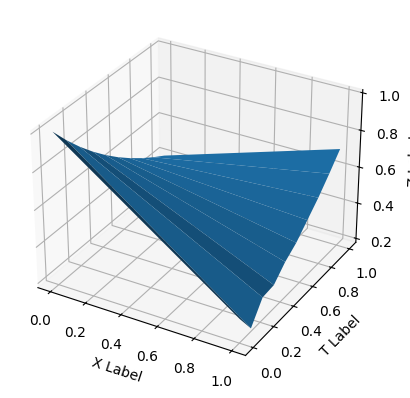

In [57]:
def angle():
    Cell = np.zeros((K, M+1))
    for i in range(0, M):
        Cell[0][i] = np.cos(np.pi * h * i)

    for i in range(K):
        Cell[i][0] = np.exp(-1 * i * tau)



    for i in range(K-1):
       for j in range(1, M+1):
           Cell[i+1][j] = Cell[i][j] + tau*(h*j + tau*i - 2*(Cell[i][j] - Cell[i-1][j])/h)


    U = np.zeros((K, M))

    for i in range(K):
        for j in range(M):
            U[i][j] = Cell[i][j]
    return U

U = angle()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.linspace(0.0, 1.0, M)
t = np.linspace(0.0, 1.0, K)
X, T = np.meshgrid(x, t)


ax.plot_surface(X, T, U)

ax.set_xlabel('X Label')
ax.set_ylabel('T Label')
ax.set_zlabel('Z Label')

plt.show()




[[ 1.          0.99992104  0.99968419 ... -0.99968419 -0.99992104
   0.        ]
 [ 0.9990005   0.          0.         ...  0.          0.
   0.        ]
 [ 0.998002    0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.36898474  0.          0.         ...  0.          0.
   0.        ]
 [ 0.36861594  0.          0.         ...  0.          0.
   0.        ]
 [ 0.3682475   0.          0.         ...  0.          0.
   0.        ]]


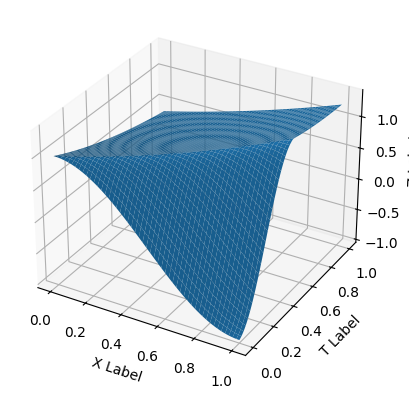

In [40]:
def square():
    Cell = np.zeros((K, M+1))
    for i in range(0, M):
        Cell[0][i] = np.cos(np.pi * h * i)

    for i in range(K):
        Cell[i][0] = np.exp(-1 * i * tau)



    for i in range(K-1):
       for j in range(1, M+1):
           Cell[i+1][j] = 2*(tau*(i + 0.5) + h*(j + 0.5) - (-1 * Cell[i+1][j-1] + Cell[i][j] - Cell[i][j-1])/h - (Cell[i+1][j-1] - Cell[i][j-1] - Cell[i][j])/(2*tau))/(2/h + 1/tau)


    U = np.zeros((K, M))

    for i in range(K):
        for j in range(M):
            U[i][j] = Cell[i][j]
    return U

U = square()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.linspace(0.0, 1.0, M)
t = np.linspace(0.0, 1.0, K)
X, T = np.meshgrid(x, t)


ax.plot_surface(X, T, U)

ax.set_xlabel('X Label')
ax.set_ylabel('T Label')
ax.set_zlabel('Z Label')

plt.show()




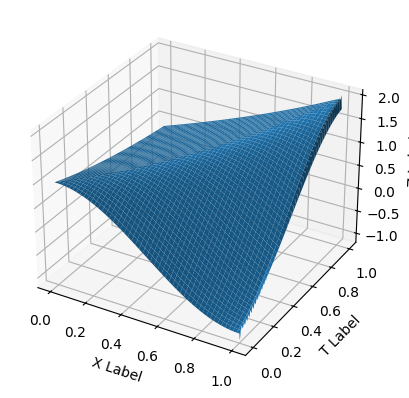

In [50]:
def four_point():
    Cell = np.zeros((K, M+2))
    for i in range(0, M):
        Cell[0][i] = np.cos(np.pi * h * i)

    for i in range(K):
        Cell[i][0] = np.exp(-1 * i * tau)



    for i in range(K-1):
       for j in range(1, M+1):
           Cell[i+1][j] = Cell[i][j] + tau*(tau * i + h * (j-1) + tau*(Cell[i][j+1] - 2*Cell[i][j] + Cell[i][j-1])/(h*h) - (Cell[i][j+1] - Cell[i][j-1]) / (2*h))


    U = np.zeros((K, M))

    for i in range(K):
        for j in range(M):
            U[i][j] = Cell[i][j]
    return U

U = four_point()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.linspace(0.0, 1.0, M)
t = np.linspace(0.0, 1.0, K)
X, T = np.meshgrid(x, t)


ax.plot_surface(X, T, U)

ax.set_xlabel('X Label')
ax.set_ylabel('T Label')
ax.set_zlabel('Z Label')

plt.show()




In [51]:
def analic(t, x):
    if(2*t <= x):
        return x*t - 0.5 * t*t + np.cos(np.pi*(2 * t - x))
    else:
        return x*t - 0.5 * t*t + (2 * t - x)*(2 * t - x)/8 + np.exp(x/2 - t)

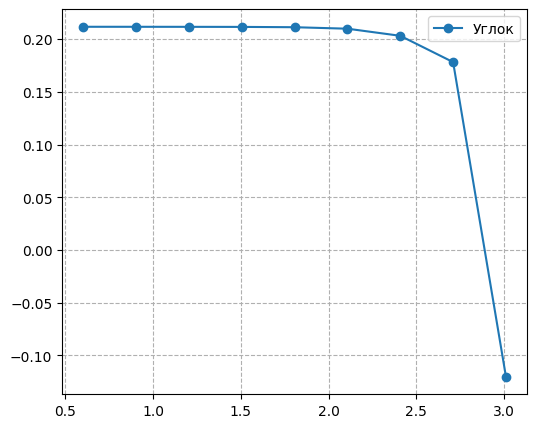

In [69]:
steps = np.array([])
mismatch = np.array([])
T = 1.0
X = 1.0
tau = 0.1
h = 0.4
tau_i = 0.1
h_i = 0.4

for st in range(1, 10):
    K = int(T / tau)
    M = int(X/h)
    U = angle()
    error = np.zeros((K, M))
    for i in range(K):
        for j in range(M):
            error[i][j] = np.abs(U[i][j] - analic(i*tau, j*h))
    mismatch = np.append(mismatch, np.log10(np.max(error)))
    steps = np.append(steps, np.log10(tau * 2**10 / tau_i))
    tau = tau / 2
    h = h / 2

plt.figure(figsize=(6, 5))
plt.plot(steps, mismatch, marker='o', label='Углок')
#plt.xlabel("h (шаг по x)")
#plt.ylabel("Максимальная ошибка")
#plt.title(f"Сходимость схемы: {method}")
plt.grid(True, which='both', ls='--')
plt.legend()
plt.show()